# Statistical Plots

**Purpose:** We will go over various statistical distributions and plots. We'll breakdown this notebook into the two different types of distributions which are `discrete` and `continuous`. Then we will derive some properties about each distribution such as showing its a pmf/pdf, derive the CDF,plot various distribution plots, and derive estimators for distribution parameters.     

In [5]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
import sqlite3 as sql
import re
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

### Bernoulli Distribution

The ***Bernoulli Distribution*** is a discrete distribution defined over $\{0,1\}$. Let $X$ be a random variable following a Berouilli distribution with parameter $p$ which we denote as $X\sim\ \text{Bernoulli($p$)}$. The pmf or probability mass function is $$
  P(X=x) =
  \begin{cases}
       1-p & \text{ if $X=0$} \\
       p & \text{ if $X=1$} \\
  \end{cases}
$$

The Bernoulli Distribution is used to represent successes and failures where $0$ is denoted as a failure and $1$ is a success by convention. We will see just soon that an extension of the Bernoulli Distribution is Binomial Distribution. 

The CDF for this distribution is simple and shown below 

$$
  F_X(x)=P(X\leq x) =
  \begin{cases}
       0 & \text{if  $ x<0$} \\
       1-p & \text{ if $ 0\leq x < 1$} \\
       1 & \text{ if $ x\geq 1$} \\
  \end{cases}
$$

The Inverse CDF is 

$$
  F^{-1}_X(u)=
  \begin{cases}
       0 & \text{ if $ 0 < u < 1-p$} \\
       1 & \text{ if $ 1-p\leq u< 1$} \\
  \end{cases}
$$


Below we plot the P.M.F and CDF for this distribution and assume $p=0.4$ for this example. <br>
**Note:** The P.M.F stands for the probability mass function which are just for the discrete distributions.

(0, 1)

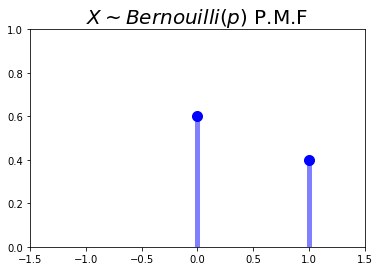

In [6]:
p=0.4
fig, ax = plt.subplots(1, 1)
x=np.arange(0,2)
plt.plot(x,sp.stats.bernoulli.pmf(x,0.4),'bo',ms=10,lw=5)
plt.title(r'$X\sim Bernouilli(p)$ P.M.F',fontsize=20)
ax.vlines(x, 0, sp.stats.bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)
plt.xlim(-1.5,1.5)
plt.ylim(0,1)

Below is a piecewise plot for the Bernoulli CDF and some of matplolib functions are described below. 

`plt.plot(x,y,marker='o',markevery=[0])` - This will plot the  piecewise plot, but format only the 1st marker <br>
`plt.plot(x,y,marker='o',markevery=[len(x)-1],color='b', markerfacecolor='none')` - This will plot the piecewise plot but format only the last marker.  <br>
`plt.vlines(x=0,ymin=0,ymax=.6,linestyles="dotted",color="b")` - This plots the vertical dotted lines at $x=0$ and $x=1$. <br>

(0, 1)

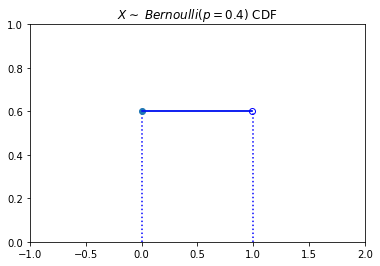

In [7]:
x=np.arange(0,1,step=.01)
y=sp.stats.bernoulli.cdf(x,p=.4)
plt.plot(x,y,marker='o',markevery=[0])
plt.plot(x,y,marker='o',markevery=[len(x)-1],color='b', markerfacecolor='none')
plt.vlines(x=0,ymin=0,ymax=.6,linestyles="dotted",color="b")
plt.vlines(x=1,ymin=0,ymax=.6,linestyles="dotted",color="b")
plt.title(r"$X\sim$ $Bernoulli(p=0.4)$ CDF")
plt.xlim(-1,2)
plt.ylim(0,1)

### Normal Distribution

The **Normal Distribution** is a continuous distribution that is defined over $(-\infty,\infty)$. This is one of the most well known distributions that has several important applications in statistical theory. This distribution is normally written as $X\sim N(\mu,\sigma)$ where $X$ is a random variable with parameters $\mu$ and $\sigma$. $\mu$ represents the average and $\sigma$ represents the standard deviation which are usually unknown when dealing with sampling statistics. Below is the Normal pdf:

$$f_X(x)=-\dfrac{1}{\sigma\sqrt{2\pi}}exp^{-\dfrac{(x-\mu)^2}{2\sigma^2}} $$

We will not discuss the CDF here as it involves the error function, and typically calcualted using computer approximations. 

**Note 1** The normal distribution is centered around $\mu$ and the spread is $\sigma^2$. <br>
**Note 2** PDF stand for probability distribution functions and typically thie term is reserved for continous distributions. <br>
**Note 3** A normal distribution with $\mu=0$ and $\sigma=1$ is called the **Standard Normal Distribution** 

Below we will plot the PDF and CDF for the standard normal distribution. 

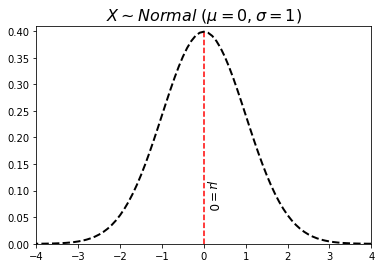

In [8]:
x=np.arange(-5,5,step=0.1)
y=sp.stats.norm.pdf(x,loc=0,scale=1)
plt.plot(x,y,linestyle="--",linewidth=2,color="black")
plt.vlines(x=0,ymin=0,ymax=max(y),color="red",linestyle="dashed")
plt.xlim(-4,4)
plt.ylim(0,np.max(y)+.01)
plt.title(r"$X\sim Normal\ (\mu=0,\sigma=1)$",fontsize=16)
plt.annotate(s=r"$\mu=0$",xy=(0,0.1),fontsize=12,rotation=-90,fontweight="bold")
plt.grid(False)